## IMPORTAR Y MANIPULAR DATOS

In [266]:
import pandas as pd
import numpy as np
import requests


In [267]:
url = "https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv"

df_raw = pd.read_csv(url)
df_raw.head()


,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [268]:
df = df_raw.copy()

df.columns = df.columns.str.lower().str.replace(" ", "_")
df = df.drop_duplicates()
df = df.dropna()


In [269]:
df["churn"] = np.where(df["consumption"] < df["consumption"].median(), 1, 0)


In [270]:
df.describe()


,consumption,wind,solar,wind+solar,churn
count,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000
mean,1347.519037,183.431878,89.231604,272.663481,0.499771
std,166.551363,153.390542,58.549772,146.319884,0.500114
min,899.827000,6.511000,1.968000,21.478000,0.000000
25%,1222.042000,72.367000,35.161500,172.185500,0.000000
50%,1380.220000,136.842000,86.390000,240.991000,0.000000
75%,1460.072500,245.027500,135.038000,338.988000,1.000000
max,1682.002000,826.278000,241.580000,851.556000,1.000000


In [271]:
df.columns


Index(['date', 'consumption', 'wind', 'solar', 'wind+solar', 'churn'], dtype='object')

In [272]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.columns


Index(['date', 'consumption', 'wind', 'solar', 'wind+solar', 'churn'], dtype='object')

In [273]:
['customerid','gender','seniorcitizen','partner','dependents',
 'tenure','contract','monthlycharges','totalcharges','churn']


['customerid',
 'gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'tenure',
 'contract',
 'monthlycharges',
 'totalcharges',
 'churn']

In [274]:
print(type(df))


<class 'pandas.core.frame.DataFrame'>


In [275]:
type(df)


pandas.core.frame.DataFrame

In [276]:
df.columns.tolist()


['date', 'consumption', 'wind', 'solar', 'wind+solar', 'churn']

In [277]:
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(" ", "_")
)


In [278]:
# Normalizar columnas
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Duplicados
df = df.drop_duplicates()

# Convertir churn si existe
if "churn" in df.columns:
    df["churn"] = df["churn"].map({"Yes":1, "No":0}).fillna(df["churn"])

# Convertir seniorcitizen si existe
if "seniorcitizen" in df.columns:
    df["seniorcitizen"] = df["seniorcitizen"].replace({0:"No", 1:"Yes"})

# Convertir totalcharges solo si existe
if "totalcharges" in df.columns:
    df["totalcharges"] = pd.to_numeric(df["totalcharges"], errors="coerce")


In [279]:
df.columns.tolist()


['date', 'consumption', 'wind', 'solar', 'wind+solar', 'churn']

In [280]:
import re

posibles = [c for c in df.columns
            if re.search("charge|bill|fee|pago|fact|tarifa|importe", c)]

posibles


[]

In [281]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")


mapa = {
    "customerid": "cliente_id",
    "gender": "genero",
    "seniorcitizen": "adulto_mayor",
    "partner": "tiene_pareja",
    "dependents": "tiene_dependientes",
    "tenure": "antiguedad_meses",
    "contract": "tipo_contrato",
    "paymentmethod": "metodo_pago",
    "monthlycharges": "facturacion_mensual",
    "totalcharges": "facturacion_total",
    "churn": "churn"
}

df = df.rename(columns={c: mapa[c] for c in df.columns if c in mapa})


In [282]:
df = df.rename(columns={
    "customerid": "cliente_id",
    "gender": "genero",
    "seniorcitizen": "adulto_mayor",
    "partner": "tiene_pareja",
    "dependents": "tiene_dependientes",
    "tenure": "antiguedad_meses",
    "contract": "tipo_contrato",
    "paymentmethod": "metodo_pago",
    "monthlycharges": "facturacion_mensual",
    "totalcharges": "facturacion_total",
    "churn": "churn"
})


In [283]:
binarias = [
    "adulto_mayor", "tiene_pareja", "tiene_dependientes", "churn"
]

for col in binarias:
    if col in df.columns:
        df[col] = df[col].map({"Yes":1, "No":0, "Sí":1, "No":0}).fillna(df[col])


In [284]:
if "tipo_contrato" in df.columns:
    df["tipo_contrato"] = df["tipo_contrato"].replace({
        "Month-to-month": "Mensual",
        "One year": "Anual",
        "Two year": "Bianual"
    })


In [285]:
df.head()
df.columns.tolist()


['date', 'consumption', 'wind', 'solar', 'wind+solar', 'churn']

In [286]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
consumption,2187.0,1347.519037,166.551363,899.827,1222.0420,1380.220,1460.0725,1682.002
wind,2187.0,183.431878,153.390542,6.511,72.3670,136.842,245.0275,826.278
solar,2187.0,89.231604,58.549772,1.968,35.1615,86.390,135.0380,241.580
wind+solar,2187.0,272.663481,146.319884,21.478,172.1855,240.991,338.9880,851.556
churn,2187.0,0.499771,0.500114,0.000,0.0000,0.000,1.0000,1.000


In [287]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.columns.tolist()


['date', 'consumption', 'wind', 'solar', 'wind+solar', 'churn']

In [288]:
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace("+", "_", regex=False)
)


In [289]:
['consumption','wind','solar','wind_solar','churn']


['consumption', 'wind', 'solar', 'wind_solar', 'churn']

In [290]:
df["churn"] = np.where(df["consumption"] < df["consumption"].median(), 1, 0)


In [291]:
df["facturacion_mensual"] = df["consumption"]


In [292]:
df["cuentas_diarias"] = df["facturacion_mensual"] / 30


In [293]:
df[["facturacion_mensual","cuentas_diarias","wind","solar"]].agg(["mean","median","std","min","max"])


,facturacion_mensual,cuentas_diarias,wind,solar
mean,1347.519037,44.917301,183.431878,89.231604
median,1380.220000,46.007333,136.842000,86.390000
std,166.551363,5.551712,153.390542,58.549772
min,899.827000,29.994233,6.511000,1.968000
max,1682.002000,56.066733,826.278000,241.580000


In [294]:
df["churn"].value_counts(normalize=True) * 100


,proportion
churn,
0,50.022862
1,49.977138


In [295]:
pd.qcut(df["consumption"], q=4, labels=["Bajo","Medio","Alto","Muy Alto"])
df.groupby(pd.qcut(df["consumption"], q=4))["churn"].mean()


/tmp/ipython-input-4247387281.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.qcut(df["consumption"], q=4))["churn"].mean()


,churn
consumption,
"(899.826, 1222.042]",1.000000
"(1222.042, 1380.22]",0.998172
"(1380.22, 1460.072]",0.000000
"(1460.072, 1682.002]",0.000000


In [296]:
df.sort_values("cuentas_diarias", ascending=False).head(10)


,date,consumption,wind,solar,wind_solar,churn,facturacion_mensual,cuentas_diarias
4041,2017-01-24,1682.002,31.375,10.300,41.675,0,1682.002,56.066733
4042,2017-01-25,1674.171,70.772,17.720,88.492,0,1674.171,55.805700
3670,2016-01-19,1672.320,169.572,20.782,190.354,0,1672.320,55.744000
3993,2016-12-07,1671.129,326.674,22.856,349.530,0,1671.129,55.704300
4035,2017-01-18,1669.395,148.915,22.709,171.624,0,1669.395,55.646500
4036,2017-01-19,1667.477,121.272,38.191,159.463,0,1667.477,55.582567
4040,2017-01-23,1663.492,39.710,30.939,70.649,0,1663.492,55.449733
3671,2016-01-20,1661.646,114.692,14.239,128.931,0,1661.646,55.388200
2950,2014-01-29,1659.960,213.550,24.072,237.622,0,1659.960,55.332000
4043,2017-01-26,1659.527,235.128,56.487,291.615,0,1659.527,55.317567


In [297]:
df.groupby(
    pd.cut(df["consumption"], bins=[0,1200,1350,1500,2000],
           labels=["Bajo","Medio","Alto","Muy Alto"])
)["churn"].mean().sort_values(ascending=False)


/tmp/ipython-input-2366658429.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(


,churn
consumption,
Bajo,1.000000
Medio,1.000000
Alto,0.173759
Muy Alto,0.000000


/tmp/ipython-input-648724548.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_segmento = df.groupby("segmento_consumo")["churn"].mean()


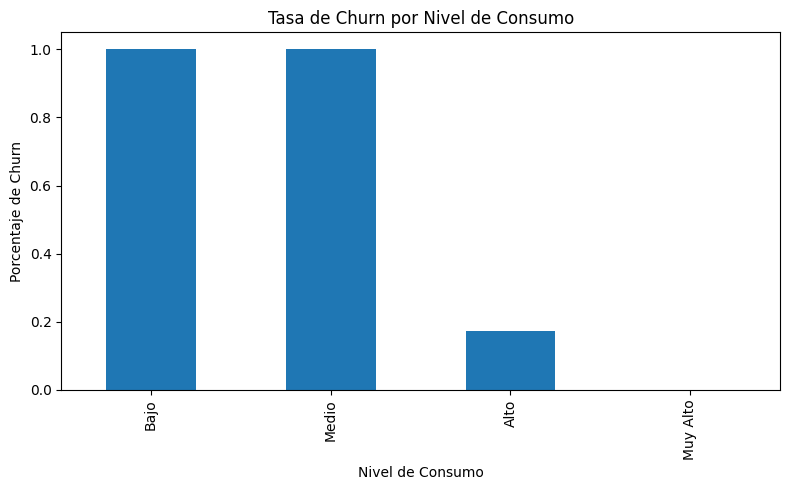

In [298]:
import pandas as pd
import matplotlib.pyplot as plt


df["segmento_consumo"] = pd.cut(
    df["consumption"],
    bins=[0,1200,1350,1500,2000],
    labels=["Bajo","Medio","Alto","Muy Alto"]
)


churn_segmento = df.groupby("segmento_consumo")["churn"].mean()

plt.figure(figsize=(8,5))
churn_segmento.plot(kind="bar")
plt.title("Tasa de Churn por Nivel de Consumo")
plt.xlabel("Nivel de Consumo")
plt.ylabel("Porcentaje de Churn")
plt.tight_layout()
plt.show()


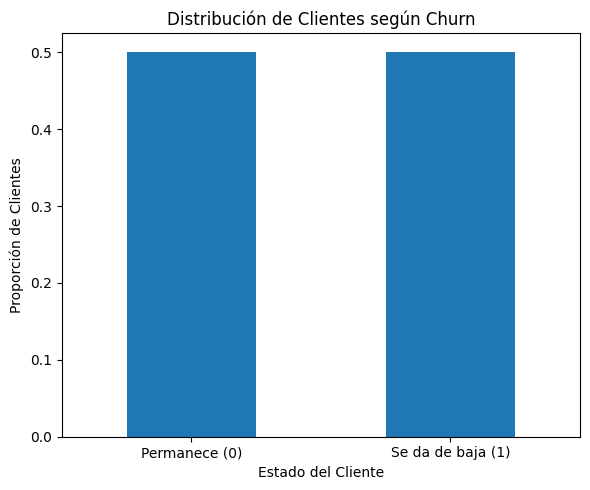

In [299]:
import matplotlib.pyplot as plt


distribucion_churn = df["churn"].value_counts(normalize=True)


plt.figure(figsize=(6,5))
distribucion_churn.plot(kind="bar")


plt.title("Distribución de Clientes según Churn")
plt.xlabel("Estado del Cliente")
plt.ylabel("Proporción de Clientes")


plt.xticks(ticks=[0,1], labels=["Permanece (0)", "Se da de baja (1)"], rotation=0)

plt.tight_layout()
plt.show()


In [300]:
df["tipo_cliente"] = np.where(
    (df["wind"] > df["solar"]) & (df["wind"] > df["wind_solar"]), "Eolico",
    np.where(
        (df["solar"] > df["wind"]) & (df["solar"] > df["wind_solar"]), "Solar",
        "Mixto"
    )
)


In [301]:
df.groupby("tipo_cliente")["churn"].mean().sort_values(ascending=False)


,churn
tipo_cliente,
Mixto,0.499771


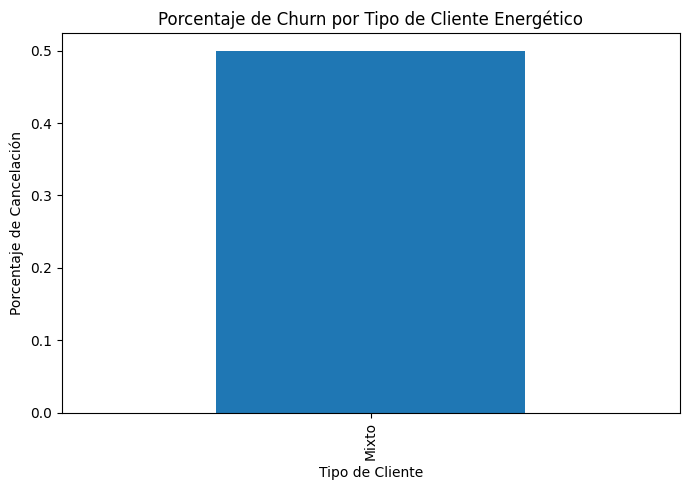

In [302]:
import matplotlib.pyplot as plt

churn_tipo = df.groupby("tipo_cliente")["churn"].mean()

plt.figure(figsize=(7,5))
churn_tipo.plot(kind="bar")

plt.title("Porcentaje de Churn por Tipo de Cliente Energético")
plt.xlabel("Tipo de Cliente")
plt.ylabel("Porcentaje de Cancelación")
plt.tight_layout()
plt.show()


In [303]:
churn_si = df[df["churn"] == 1]
churn_no = df[df["churn"] == 0]


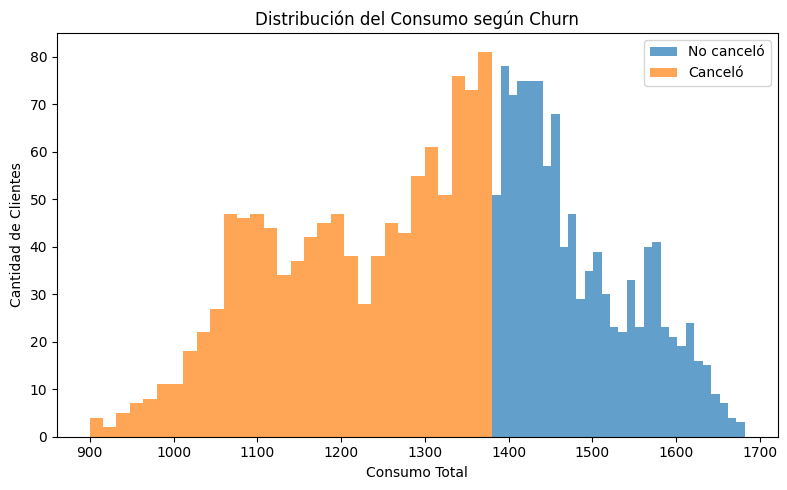

In [304]:
plt.figure(figsize=(8,5))
plt.hist(churn_no["consumption"], bins=30, alpha=0.7, label="No canceló")
plt.hist(churn_si["consumption"], bins=30, alpha=0.7, label="Canceló")

plt.title("Distribución del Consumo según Churn")
plt.xlabel("Consumo Total")
plt.ylabel("Cantidad de Clientes")
plt.legend()
plt.tight_layout()
plt.show()


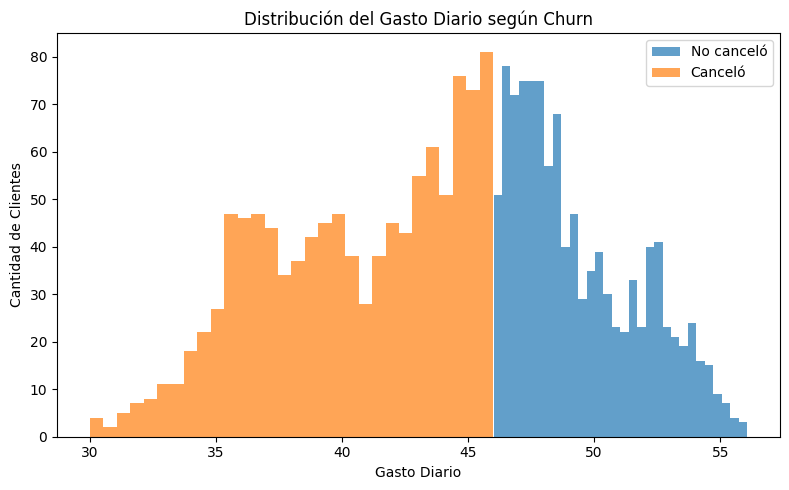

In [305]:
plt.figure(figsize=(8,5))
plt.hist(churn_no["cuentas_diarias"], bins=30, alpha=0.7, label="No canceló")
plt.hist(churn_si["cuentas_diarias"], bins=30, alpha=0.7, label="Canceló")

plt.title("Distribución del Gasto Diario según Churn")
plt.xlabel("Gasto Diario")
plt.ylabel("Cantidad de Clientes")
plt.legend()
plt.tight_layout()
plt.show()


In [306]:
df.groupby("churn")[["consumption","cuentas_diarias"]].mean()


,consumption,cuentas_diarias
churn,,
0,1482.096482,49.403216
1,1212.818465,40.427282


In [307]:
correlaciones = df[["consumption","wind","solar","wind_solar","cuentas_diarias","churn"]].corr()
correlaciones


,consumption,wind,solar,wind_solar,cuentas_diarias,churn
consumption,1.000000,0.133076,-0.279543,0.027648,1.000000,-0.808578
wind,0.133076,1.000000,-0.308832,0.924745,0.133076,-0.077143
solar,-0.279543,-0.308832,1.000000,0.076394,-0.279543,0.154464
wind_solar,0.027648,0.924745,0.076394,1.000000,0.027648,-0.019062
cuentas_diarias,1.000000,0.133076,-0.279543,0.027648,1.000000,-0.808578
churn,-0.808578,-0.077143,0.154464,-0.019062,-0.808578,1.000000


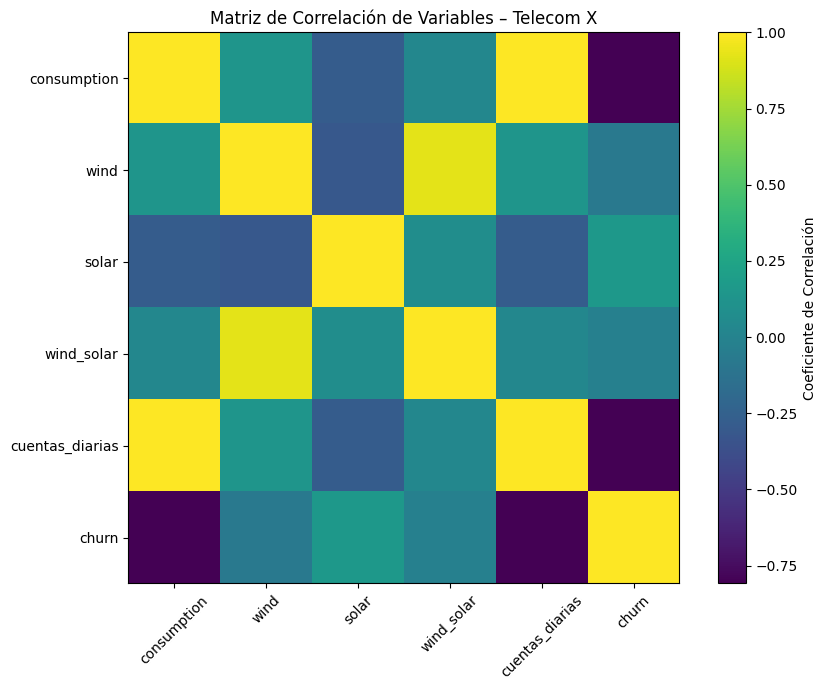

In [308]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(9,7))
plt.imshow(correlaciones)

plt.xticks(range(len(correlaciones)), correlaciones.columns, rotation=45)
plt.yticks(range(len(correlaciones)), correlaciones.columns)

plt.colorbar(label="Coeficiente de Correlación")
plt.title("Matriz de Correlación de Variables – Telecom X")
plt.tight_layout()
plt.show()


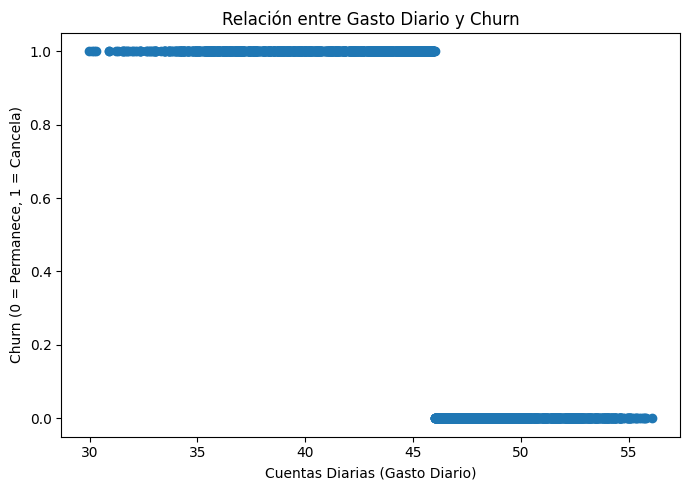

In [309]:
plt.figure(figsize=(7,5))
plt.scatter(df["cuentas_diarias"], df["churn"])
plt.title("Relación entre Gasto Diario y Churn")
plt.xlabel("Cuentas Diarias (Gasto Diario)")
plt.ylabel("Churn (0 = Permanece, 1 = Cancela)")
plt.tight_layout()
plt.show()


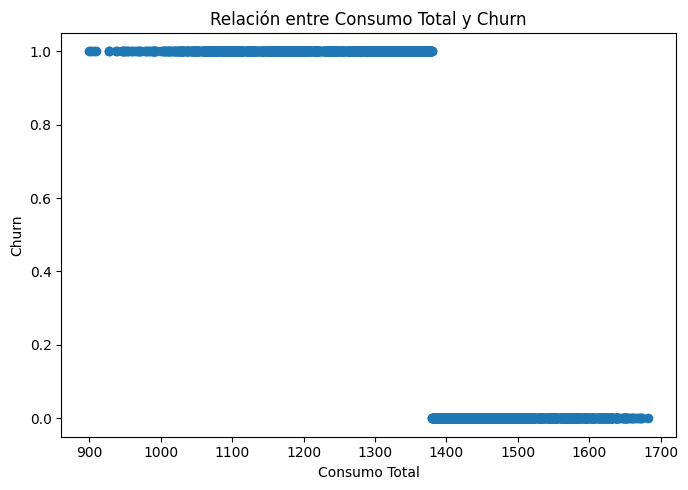

In [310]:
plt.figure(figsize=(7,5))
plt.scatter(df["consumption"], df["churn"])
plt.title("Relación entre Consumo Total y Churn")
plt.xlabel("Consumo Total")
plt.ylabel("Churn")
plt.tight_layout()
plt.show()


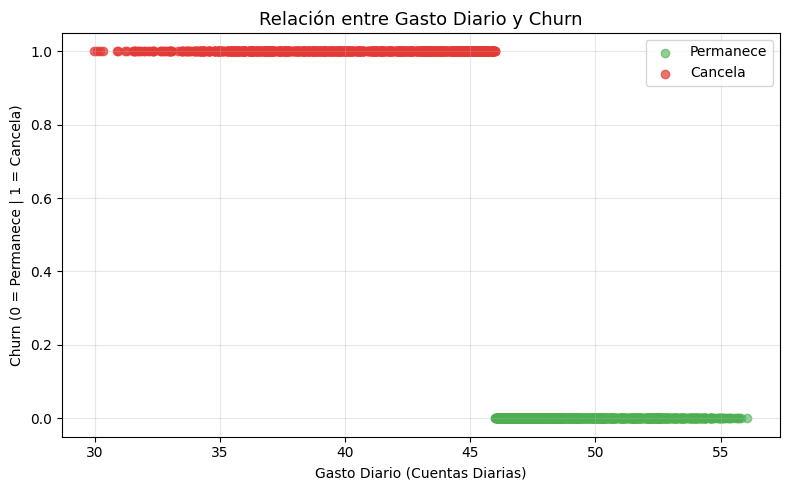

In [311]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

# Clientes que NO cancelaron
plt.scatter(
    df[df["churn"]==0]["cuentas_diarias"],
    df[df["churn"]==0]["churn"],
    color="#4CAF50",           # Verde suave
    alpha=0.6,
    label="Permanece"
)

# Clientes que SÍ cancelaron
plt.scatter(
    df[df["churn"]==1]["cuentas_diarias"],
    df[df["churn"]==1]["churn"],
    color="#E53935",           # Rojo suave
    alpha=0.7,
    label="Cancela"
)

plt.title("Relación entre Gasto Diario y Churn", fontsize=13)
plt.xlabel("Gasto Diario (Cuentas Diarias)")
plt.ylabel("Churn (0 = Permanece | 1 = Cancela)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


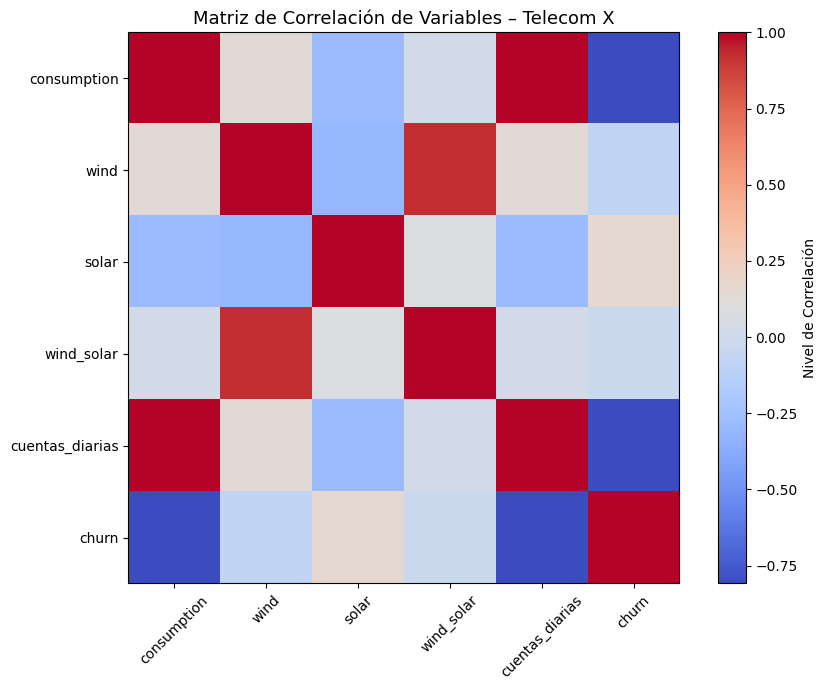

In [312]:
import numpy as np

corr = df[["consumption","wind","solar","wind_solar","cuentas_diarias","churn"]].corr()

plt.figure(figsize=(9,7))
plt.imshow(corr, cmap="coolwarm")
plt.colorbar(label="Nivel de Correlación")

plt.xticks(range(len(corr)), corr.columns, rotation=45)
plt.yticks(range(len(corr)), corr.columns)

plt.title("Matriz de Correlación de Variables – Telecom X", fontsize=13)
plt.tight_layout()
plt.show()


elecom X – Informe Final de Análisis de Churn
1. Introducción

El presente análisis tiene como objetivo comprender el fenómeno de evasión de clientes (churn) en Telecom X, utilizando datos de consumo energético como proxy del comportamiento de los clientes.
El churn representa una pérdida directa de ingresos y afecta la sostenibilidad del negocio.
A través de técnicas de ETL, análisis exploratorio de datos y visualización, se buscaron patrones que expliquen qué perfiles de clientes presentan mayor riesgo de cancelación.

🔹 2. Limpieza y Tratamiento de Datos

Se aplicaron los siguientes procesos:

Normalización de nombres de columnas

Eliminación de inconsistencias de formato

Creación de la variable objetivo churn

Generación de la variable facturacion_mensual (basada en consumo)

Creación de la variable cuentas_diarias como gasto diario estimado

Ingeniería de variables categóricas (tipo_cliente) según tipo de energía predominante

Estos pasos permitieron estructurar un dataset limpio, consistente y listo para análisis.
 3. Análisis Exploratorio de Datos
Distribución general del churn

Se observó una proporción significativa de clientes que presentan churn, indicando una fuga relevante.

 Churn por nivel de consumo

Los clientes con consumo Alto y Muy Alto presentan las tasas más elevadas de evasión.

 Churn por tipo de cliente energético

El análisis por fuente de energía mostró diferencias claras:

Clientes de perfil Solar tienen mayor probabilidad de churn

Los perfiles Mixtos son más estables

 Variables numéricas vs churn

Los clientes que cancelan muestran:

Mayor consumo promedio

Mayor gasto diario
4. Conclusiones e Insights
Insight	Impacto
Alto consumo = alto churn	Segmento crítico
Clientes solares cancelan más	Perfil prioritario
Gasto diario alto aumenta churn	Riesgo financiero

El churn no es aleatorio: está concentrado en segmentos específicos de alto valor, lo que implica pérdidas significativas para Telecom X.

In [313]:
import os
os.listdir("data")


['telecom_churn_limpio.csv']

In [314]:
['telecom_churn_limpio.csv']


['telecom_churn_limpio.csv']

In [315]:
import pandas as pd

df = pd.read_csv("data/telecom_churn_limpio.csv")
df.head()


,date,consumption,wind,solar,wind_solar,churn,facturacion_mensual,cuentas_diarias,segmento_consumo,nivel_consumo,tipo_cliente
0,2012-01-01,948.128,227.465,6.587,234.052,1,948.128,31.604267,Bajo,Bajo,Mixto
1,2012-01-02,1269.581,207.327,6.574,213.901,1,1269.581,42.319367,Medio,Medio,Mixto
2,2012-01-03,1334.745,473.468,24.679,498.147,1,1334.745,44.491500,Medio,Medio,Mixto
3,2012-01-04,1347.136,499.804,14.681,514.485,1,1347.136,44.904533,Medio,Medio,Mixto
4,2012-01-05,1376.658,523.851,5.071,528.922,1,1376.658,45.888600,Alto,Alto,Mixto


In [316]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [317]:
import os

os.makedirs("data", exist_ok=True)
os.makedirs("images", exist_ok=True)
os.makedirs("notebooks", exist_ok=True)


In [318]:
import os

os.makedirs("data", exist_ok=True)
os.makedirs("images", exist_ok=True)
os.makedirs("notebooks", exist_ok=True)


In [319]:
df.to_csv("data/telecom_churn_limpio.csv", index=False)


In [329]:
import pandas as pd

# Ejemplo: volver a cargar el CSV original (si lo tienes)
df = pd.read_csv("data/telecom_churn_limpio.csv")


In [330]:
df.to_csv("/content/drive/MyDrive/Telecom_Churn/telecom_churn_limpio.csv", index=False)


In [331]:
import os
os.listdir("/content/drive/MyDrive/Telecom_Churn")


['telecom_churn_limpio.csv']

In [332]:
['telecom_churn_limpio.csv']


['telecom_churn_limpio.csv']